<a href="https://colab.research.google.com/github/android1045/Siber-Guvenlik-icin-Veri-Madenciligi/blob/main/%C3%B6dev1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Gerekli kütüphanelerin import edilmesi
import numpy as np
import pandas as pd
from tensorflow.keras.utils import get_file

# Veri setinin sitesinden indirilmesi
try:
    path = get_file('kddcup.data_10_percent.gz', origin='http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz')
except:
    print('İndirme hatası')
    raise

print(path)


2144903/2144903 [==============================] - 0s 0us/step
/root/.keras/datasets/kddcup.data_10_percent.gz


In [ ]:
# Veriyi bir Pandas DataFrame'e yükleme
df = pd.read_csv(path, dtype=str, encoding = "utf-8" ,header=None)
df.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41],
           dtype='int64')

In [ ]:
# DataFrame'e sütun başlıklarını ekleme
df.columns = [
    'duration',
    'protocol_type',
    'service',
    'flag',
    'src_bytes',
    'dst_bytes',
    'land',
    'wrong_fragment',
    'urgent',
    'hot',
    'num_failed_logins',
    'logged_in',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_count',
    'dst_host_srv_count',
    'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate',
    'outcome'
]

In [ ]:
# DataFrame eklenen sütunlarını gösterme
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'outcome'],
      dtype='object')

In [ ]:
# İlk 5 satırı gösterme
df[0:5]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.00,0.00,0.11,0.00,0.00,0.00,0.00,0.00,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,normal.


In [ ]:
# Veri setindeki toplam satır sayısını gösterme
print("Toplam {} satır okundu.".format(len(df)))
print('=' * 40)
print('Veri noktalarının sayısı:', df.shape[0])
print('=' * 40)
print('feature sayısı:', df.shape[1])
print('=' * 40)

Toplam 494021 satır okundu.
Veri noktalarının sayısı: 494021
feature sayısı: 42


In [ ]:
# Çıktı etiketlerini kontrol etme
output = df['outcome'].values
labels = set(output)
print('Farklı çıktı etiketleri:', labels)
print('=' * 125)
print('Farklı çıktı etiketlerinin sayısı:', len(labels))

Farklı çıktı etiketleri: {'buffer_overflow.', 'back.', 'smurf.', 'loadmodule.', 'warezclient.', 'land.', 'satan.', 'ftp_write.', 'neptune.', 'pod.', 'imap.', 'teardrop.', 'rootkit.', 'portsweep.', 'guess_passwd.', 'nmap.', 'normal.', 'multihop.', 'ipsweep.', 'phf.', 'warezmaster.', 'spy.', 'perl.'}
Farklı çıktı etiketlerinin sayısı: 23


In [ ]:
# Veri Temizleme
# NULL değerleri kontrol etme
print('Veri setindeki NULL değer sayısı', len(df[df.isnull().any(1)]))
print('=' * 40)

Veri setindeki NULL değer sayısı 0


<ipython-input-12-7b8883ef9b3f>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  print('Veri setindeki NULL değer sayısı', len(df[df.isnull().any(1)]))


In [ ]:
# Tekrar eden değerleri kontrol etme ve bunları kaldırma
df.drop_duplicates(keep='first', inplace=True)

# Şu anlık, yalnızca NA değerlerini (eksik değerlere sahip satırları) kaldırma
df.dropna(inplace=True, axis=1)

print("Toplam {} satır okundu.".format(len(df)))

Toplam 145586 satır okundu.


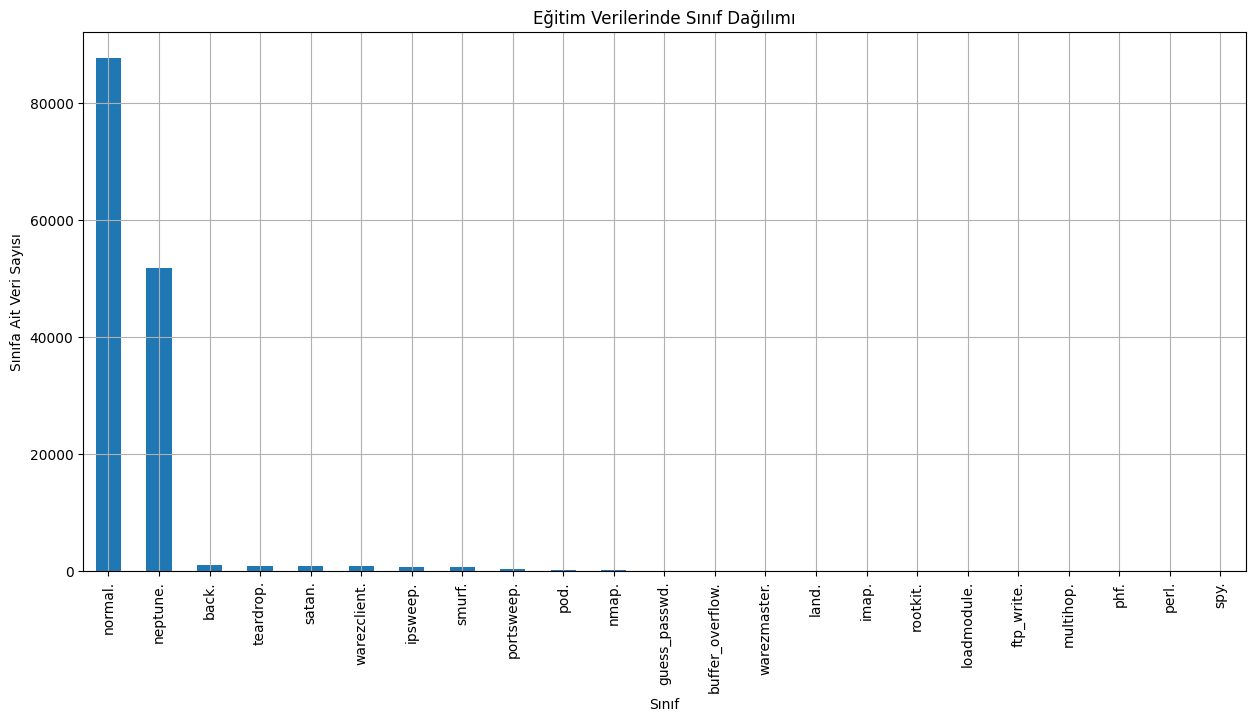

In [ ]:
# EDA işlemi

import matplotlib.pyplot as plt
from matplotlib.pyplot import *

# Sınıf dağılımını gösterme
plt.figure(figsize=(15, 7))
class_distribution = df['outcome'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Sınıf')
plt.ylabel('Sınıfa Ait Veri Sayısı')
plt.title('Eğitim Verilerinde Sınıf Dağılımı')
plt.grid()
plt.show()

In [ ]:
# Özellik seçimi
feature = df.drop(['protocol_type', 'service', 'flag', 'land', 'logged_in', 'is_host_login', 'is_guest_login', 'outcome'], axis=1)
target = df['outcome']

# Etiket düzenleme
target = target.apply(lambda x: 'abnormal' if x != 'normal.' else x)


In [ ]:
# Z-skor normalizasyonu
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
feature_std = scaler.fit_transform(feature)

In [ ]:
# Normalleştirilmiş özellikleri gösterme
print("Normalleştirilmiş Özellikler:")
print(pd.DataFrame(feature_std, columns=feature.columns).head())

Normalleştirilmiş Özellikler:
   duration  src_bytes  dst_bytes  wrong_fragment    urgent      hot  \
0  -0.10785  -0.004293   0.042596       -0.084394 -0.004737 -0.07021   
1  -0.10785  -0.004261  -0.039036       -0.084394 -0.004737 -0.07021   
2  -0.10785  -0.004263  -0.025042       -0.084394 -0.004737 -0.07021   
3  -0.10785  -0.004272  -0.025042       -0.084394 -0.004737 -0.07021   
4  -0.10785  -0.004273  -0.013613       -0.084394 -0.004737 -0.07021   

   num_failed_logins  num_compromised  root_shell  su_attempted  ...  \
0          -0.018022        -0.007905    -0.01944     -0.008613  ...   
1          -0.018022        -0.007905    -0.01944     -0.008613  ...   
2          -0.018022        -0.007905    -0.01944     -0.008613  ...   
3          -0.018022        -0.007905    -0.01944     -0.008613  ...   
4          -0.018022        -0.007905    -0.01944     -0.008613  ...   

   dst_host_count  dst_host_srv_count  dst_host_same_srv_rate  \
0       -1.740383           -1.054224  